<img src="https://drive.google.com/uc?export=view&id=1ulQviLAnsnBLrWSQs3vXuTUsAI0vloz-" width="100%">

# Modelamiento y Evaluación
---


In [ ]:
!pip install pyLDAvis==3.3.1
!pip install langdetect
!pip install langcodes
!pip install language_data
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=c7b9562a45244f96e088564f1705264a0faecdc53

## **1. Implementación del modelo**
---

A continuación encuentra los pasos que puede seguir para la implementación de un modelo:

### **1.0. Importando datos e implementación de embeddings**
---


In [ ]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

import pandas as pd
import numpy as np
import ast
from langdetect import detect
import langcodes
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from IPython.display import display
plt.style.use("ggplot")
import ast
from wordcloud import WordCloud
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Proyecto NLP/Datos/"

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def tweak_df(df: pd.DataFrame)->pd.DataFrame:
  return (
      df
      .filter(['song', 'artist', 'artists', 'text', 'danceability', 'energy', 'valence', 'duration_ms', 'year'])
      .astype({
        'song': 'string', 'artist': 'string', 'artists': 'string', 'text': 'string', 'danceability': 'float', 'energy': 'float', 'valence': 'float', 'year': 'int',
        })
  )

In [ ]:
df_spotify_millsongdata = pd.read_csv(path+'spotify_millsongdata.csv')
df_tracks_features = pd.read_csv(path+'tracks_features.csv')


#Fusión de dataframes
merged_df = pd.merge(df_spotify_millsongdata, df_tracks_features, left_on=['song'], right_on=['name'])
merged_df = merged_df[merged_df.apply(lambda row: row['artist'] in row['artists'], axis=1)]


def has_exact_match(row):
  return any(item.lower().strip() == row['artist'].lower().strip() for item in ast.literal_eval(row['artists']))

# Apply the function to filter rows
merged_df = merged_df[merged_df.apply(has_exact_match, axis=1)].reset_index(drop=True)

#Aquí filtro las columnas que nos interesan del dataset y cambio el tipo de dato de ciertas columnas.
filtered_df=merged_df.pipe(tweak_df).sort_values(by='year', ascending=True)

filtered_df['language_code'] = filtered_df['text'].apply(lambda x: detect(x))
filtered_df['language_name'] = filtered_df['language_code'].apply(lambda x: langcodes.Language.get(x).language_name())
filtered_df = filtered_df[filtered_df['language_name'] == 'English']


filtered_df=filtered_df.drop_duplicates(subset=['text'], keep='last', inplace=False, ignore_index=True)

filtered_df=filtered_df.drop(['artists','language_code','language_name'], axis=1)

filtered_df

**A spacy**

In [ ]:
def to_spacy(df, nlp):
    texts = list(df['text'])
    corpus = list(nlp.pipe(texts, n_process=4))
    return corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = to_spacy(filtered_df, nlp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Texto preprocesado**

In [ ]:
def preprocess_lemma_con_rep(doc, pos_list):
    pos_tags = [token.lemma_ for token in doc if ((token.pos_ in pos_list)&(not(token.is_stop)))]
    pos_tags =[x.lower() for x in pos_tags]
    preprocess_text = unidecode(" ".join(pos_tags))
    return preprocess_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
preprocess = [preprocess_lemma_con_rep(doc, ["VERB", "NOUN", "ADJ"]) for doc in corpus]
serie = pd.Series(preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
serie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       fine state know get eye blazin love sit gazin ...
1       know love come life turn song know moment plac...
2       button shoe coat hat play game wait open door ...
3       heart talk heart talk divine hear song love te...
4       land lot land starry sky fence let ride wide o...
                              ...                        
6550    vein poppin love let pipe needle guide get wro...
6551    want leave break search new want superlove wan...
6552    love people ask live tell know guess understan...
6553    sugar sweet kind like meet midnight tell go kn...
6554    night look know dance hall cutie love lay get ...
Length: 6555, dtype: object

**Vectorización de textos**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect_bow = CountVectorizer(max_features=2000).fit(serie)
features_bow =vect_bow.transform(serie)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_tfidf = TfidfVectorizer(max_features=2000)
features_tfidf =vect_tfidf.fit_transform(serie)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vocab_bow = vect_bow.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **1.1. K-Means**
---
Optamos por técnicas de agrupamiento, como el clustering, porque nuestros datos no están etiquetados previamente. El clustering permite dividir las canciones en grupos (clusters) con características similares en función de las palabras y patrones de lenguaje utilizados en las letras. Esto nos ayuda a explorar la diversidad de emociones y temas presentes en las canciones de manera no supervisada, lo que es especialmente útil cuando no disponemos de etiquetas de sentimientos predefinidas.

#### **1.1.1. Importar Modelo**
---

Seleccione la librería de NLP que utilizará para el modelo e impórtelo:

In [ ]:
#Revise the size of the features.
display(features_tfidf.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6555, 2000)

En este caso el número de dimensiones está bien. Por lo que la reducciòn dimensional PCA no será utilizada

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **1.1.2 Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo:

In [ ]:
k_range = np.arange(2, 9, 1)
display(k_range)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([2, 3, 4, 5, 6, 7, 8])

Hemos seleccionado valores de k hasta de 8, debido a que el NRC emotion lexicon reconoce 8 emociones o sentimientos, y al ser un valor moderado lo tomaremos como referencia.

Adicionalmente, usaremos TF-IDF al ser mejor para este modelo.

In [ ]:
best_score = -1 # variable donde almacenamos el mejor modelo
metrics = [] # lista donde almacenamos las métricas
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0, n_init=10).fit(features_tfidf) # entrenamiento
    score = silhouette_score(
        features_tfidf,
        model.predict(features_tfidf)
        ) # evaluación
    metrics.append(score)
    if score > best_score: # validamos si la métrica mejora
        best_score = score # guardamos la mejor métrica
        best_model = model # guardamos el mejor modelo



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **1.1.3 Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


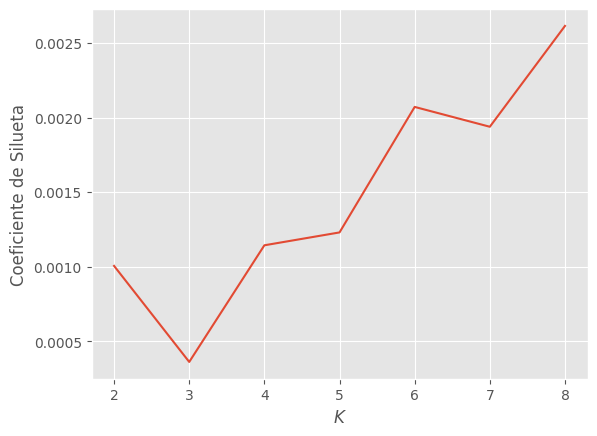

In [ ]:
#Visualization of the coeficient of silouhete.
fig, ax = plt.subplots()
ax.plot(k_range, metrics)
ax.set_xlabel("$K$")
ax.set_ylabel("Coeficiente de Silueta")
ax.set_xticks(k_range)
fig.show()

De acuerdo a la figura un valor mayor de clusters (K) mejora el coeficiente de silueta, excepto para k=3 que exhibe un valor bajo. En este caso nuestro mejor modelo tiene k=8

In [ ]:
print('Coeficiente de silueta:')
print(str(best_score))


Coeficiente de silueta:
0.0026142582392440607


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **1.1.4. Visualización de los resultados**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


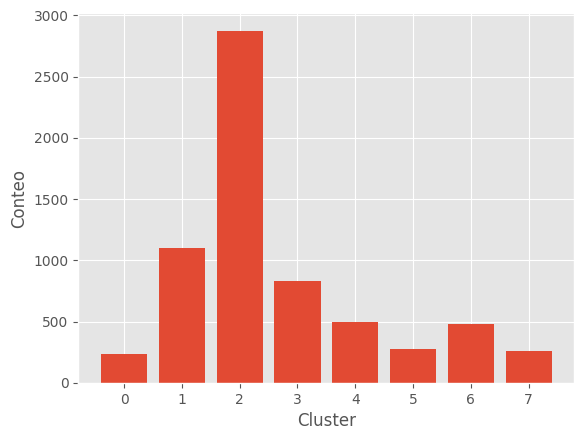

In [ ]:
clusters = best_model.predict(features_tfidf)
cats, counts = np.unique(clusters, return_counts=True)
fig, ax = plt.subplots()
ax.bar(cats, counts)
ax.set_xlabel("Cluster")
ax.set_ylabel("Conteo")
fig.show()


In [ ]:
# Fit the best model to your data
best_model.fit(features_tfidf)

# Get cluster labels for each data point
cluster_labels = best_model.labels_

# Iterate over each cluster and create a word cloud
for cluster in range(best_model.n_clusters):
    # Filter the documents that belong to the current cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster]
    cluster_documents = [corpus[i] for i in cluster_indices]

    # Combine the documents into a single text for the word cloud
    cluster_text = ' '.join([doc.text for doc in cluster_documents])  # Extract text content from spaCy Doc objects

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

De acuerdo con las nubes de palabras, muchas canciones tienen en común la temática del amor. El cual está presente en los clusters: 2, 3, 5, 6 y 7 que muestran una tendencia positiva y hacia las emociones de disfrute. Por su parte los clusters 0, 1 y 4 muestran varias palabras relacionadas con tiempo lo que podría mostrar una tendencia hacia un sentimiento de anticipación. En ninguno de los clusters se encuentran palabras predominantes con un carácter negativo, por lo que la presencia de este tipo de canciones podría ser minoritario

### **1.2. Latent Dirichlet Alocation**
---
**Modelos de tópicos**: El modelado de temas, como LDA (Latent Dirichlet Allocation), es esencial para descubrir los temas dominantes dentro del corpus de letras de canciones. Esto nos permite identificar de manera automática los temas o tópicos más recurrentes en las canciones, lo que puede ser crucial para entender el contexto emocional de las mismas. Además, el modelado de temas puede ayudarnos a organizar y categorizar las canciones de manera más efectiva.

#### **1.2.1. Importar Modelo 1**
---

Seleccione la librería de NLP que utilizará para el modelo e impórtelo:

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **1.2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo:

In [ ]:
lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=1 / 3,
    topic_word_prior=1 / 20,
    random_state=42,
    ).fit(features_bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


En este caso el número de dimensiones está bien. Por lo que la reducciòn dimensional PCA no será utilizada

In [ ]:
features_lda = lda.transform(features_bow)
print(features_lda.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6555, 10)


In [ ]:
type(features_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numpy.ndarray

In [ ]:
topic_importances = features_lda.mean(axis=0)
print(topic_importances.shape)

(10,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **1.2.3. Visualización de los resultados**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


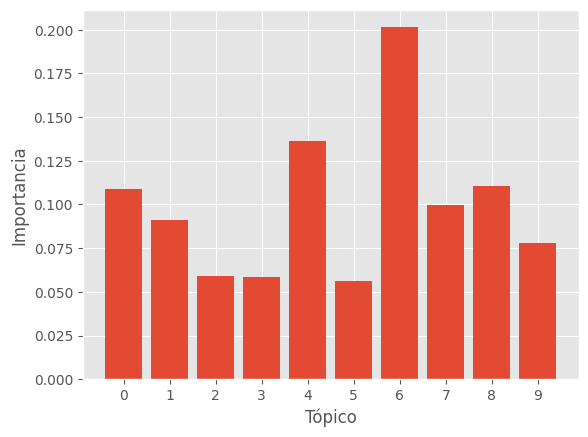

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

In [ ]:
components = lda.components_
print(components.shape)

(10, 2000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Iteramos sobre cada tópico
for i, comp in enumerate(components):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_bow, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: get go know time need feel look stop want wanna crazy tonight say think tell
Tópico 1: night blue burn sky woman sun hear rain high wind go day river fire morning
Tópico 2: let little sing song hear thing get bad wish go talk ready call bit come
Tópico 3: come play stand ride want right big music shake way power talk fight friend dance
Tópico 4: dream eye day light time come leave turn child know night wait year star believe
Tópico 5: girl baby good boy hot little be get dance break young honey pretty man want
Tópico 6: love know heart want feel need hold time life baby think come find way go
Tópico 7: way tell try time mind lie want be find know lose home think thing easy
Tópico 8: man think want life head know people look say like get dead time kill see
Tópico 9: free run man fly life round set ground live follow walk beat break day send


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

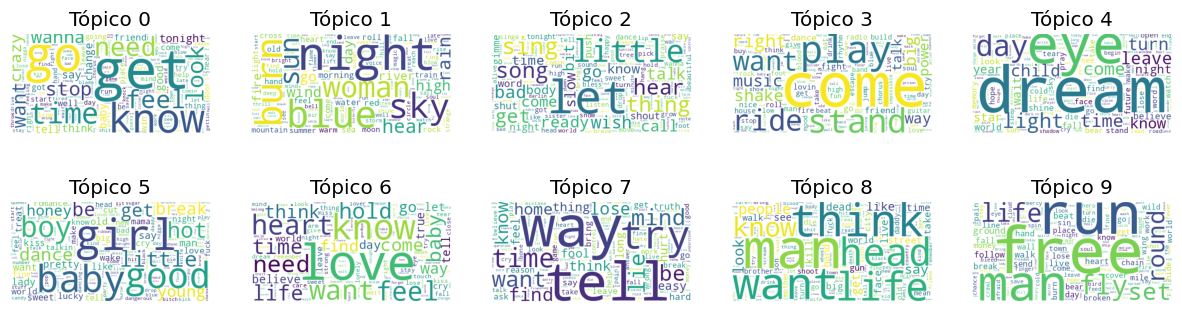

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 4))
cont = 0
for i in range(2):
    for j in range(5):
        ax = axes[i, j]
        freqs = {
            term: abs(float(importance))
            for term, importance in zip(vocab_bow, components[cont])
        }
        wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
        ax.imshow(wc)
        ax.axis("off")
        ax.set_title(f"Tópico {cont}")
        cont += 1
fig.show()

Con esto podemos ver algunos tópicos clave como:

- **Tópico 1**: Canciones de tono romántico.
- **Tópico 2**: Canciones animadas de tono de fiesta o emocionantes.
- **Tópico 3**: Parece estar relacionada a canciones motivacionales.
- **Tópico 4**: Canciones sobre sueños o metas.
- **Tópico 5**: Canciones con un tono atrevido o sexual.
- **Tópico 6**: Canciones de tono romántico un poco más atrevida.
- **Tópico 7**: Tono más serio, pueden ser canciones reflexivas sobre la vida y la muerte.
- **Tópico 9**: El tópico de la canción puede ser triste ya que habla de dolor, muerte, llorar y río.





Vamos a generar una nube de palabras ponderada con la importancia de cada término en un tópico para visualizar mejor los tópicos:

#### **1.2.4. Visualización pyLDAvis**

In [ ]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Habilitamos el uso de la librería en notebooks:

In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Especificamos a la librería el vectorizador usado y el modelo LDA entrenado:

In [ ]:
vect_bow.get_feature_names = vect_bow.get_feature_names_out
ldavis_prepared = sklearn_lda.prepare(lda, features_bow, vect_bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Podemos visualizar el tablero interactivo de LDA:

In [ ]:
display(ldavis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.065648 -0.149733       1        1  18.888070
4     -0.183073  0.006636       2        1  12.666315
0      0.075952 -0.110102       3        1  12.015435
8      0.035903  0.008165       4        1  11.930388
7     -0.008237 -0.187710       5        1   9.673567
1     -0.168262  0.148292       6        1   8.492719
9     -0.105192  0.058814       7        1   7.768754
5      0.252111  0.060682       8        1   6.267078
3      0.083510  0.117707       9        1   6.209277
2      0.082935  0.047249      10        1   6.088398, topic_info=       Term          Freq         Total Category  logprob  loglift
1024   love  10521.000000  10521.000000  Default  30.0000  30.0000
978     let   5005.000000   5005.000000  Default  29.0000  29.0000
326    come   6302.000000   6302.000000  Default  28.0000  28.0000
728    girl   2407.000000   2407.000000  Default  27.0000  27.0000
73     baby   3530.000000   3530.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
1730  sweet    142.630985    935.105259  Topic10  -5.2044   0.9184
1796   time    200.776955   5529.549278  Topic10  -4.8625  -0.5169
1157  night    177.459304   3263.882271  Topic10  -4.9860  -0.1131
945    know    206.484761   9743.174264  Topic10  -4.8345  -1.0553
1461    say    165.147863   2554.562247  Topic10  -5.0579   0.0600

[727 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
23        2  0.043063    alarm
23        4  0.064595    alarm
23        7  0.882798    alarm
24        6  0.983417  alcohol
32        1  0.970150      ami
...     ...       ...      ...
1997      4  0.066737    young
1997      6  0.015806    young
1997      7  0.084299    young
1997      8  0.586583    young
1997     10  0.005269    young

[2748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 1, 9, 8, 2, 10, 6, 4, 3])

#### **1.2.5. Correlación de tópicos con respecto a las otras variables de las canciones (Danceability, energy y valencia)**

In [ ]:
array_df = pd.DataFrame(features_lda, columns=[f'Top_{i}' for i in range(0, 10)])

# Concatenate the original DataFrame and the new DataFrame horizontally
result_df = pd.concat([filtered_df[["danceability","energy","valence"]], array_df], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,danceability,energy,valence,Top_0,Top_1,Top_2,Top_3,Top_4,Top_5,Top_6,Top_7,Top_8,Top_9
0,0.605,0.233,0.740,0.285899,0.108082,0.114459,0.120868,0.196603,0.009319,0.134591,0.010607,0.010982,0.008589
1,0.617,0.208,0.480,0.013382,0.012229,0.052550,0.013432,0.225279,0.014694,0.632873,0.012146,0.011728,0.011689
2,0.582,0.340,0.836,0.014278,0.047721,0.066593,0.102714,0.494964,0.014318,0.095759,0.133894,0.015242,0.014517
3,0.719,0.209,0.745,0.010047,0.163171,0.243000,0.090934,0.010412,0.010150,0.441099,0.010286,0.010311,0.010592
4,0.614,0.363,0.746,0.008911,0.150232,0.160498,0.086451,0.450892,0.008646,0.026364,0.009205,0.064905,0.033897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,0.706,0.666,0.599,0.006294,0.005172,0.184411,0.005258,0.235580,0.005506,0.240963,0.005178,0.306412,0.005228
6551,0.664,0.783,0.976,0.539691,0.006378,0.026323,0.007521,0.006213,0.241672,0.008209,0.006914,0.006239,0.150840
6552,0.486,0.316,0.325,0.006419,0.006420,0.016882,0.006058,0.162751,0.006015,0.431821,0.007792,0.063043,0.292799
6553,0.571,0.819,0.737,0.128629,0.005534,0.005734,0.007559,0.005581,0.294214,0.535356,0.006280,0.005536,0.005576


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


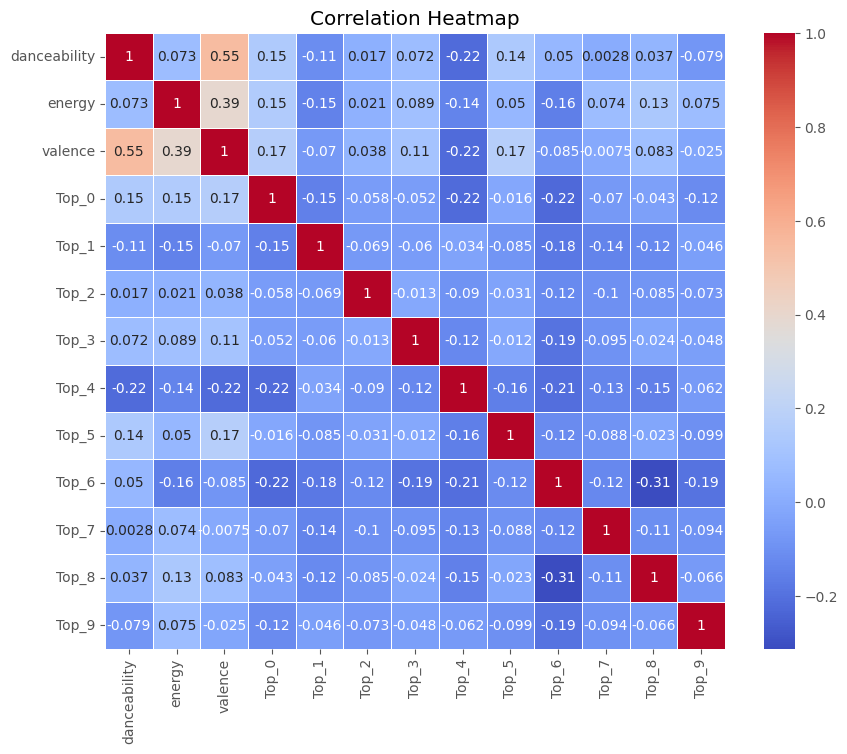

In [ ]:
correlation_matrix = result_df.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

- **Tópico 1**: Canciones de tono romántico. Este tipo de canciones tienen correlación negativa con respecto a la energía (-11%) que hace sentir la canción. Esto tiene sentido ya que las canciones muy románticas tienden a ser tranquilas.
- **Tópico 2**: Canciones animadas de tono de fiesta o emocionantes. Este tipo de canciones exhiben correlación positivas con respecto a la danceability (10%) y la valencia (13%), lo cual también tiene bastante sentido ya que las canciones de fiesta y emocionantes se prestan para bailar y lo hacen sentir a una más feliz o contento que es lo que expresa la valencia.
- **Tópico 3**: Parece estar relacionada a canciones motivacionales. Este tipo de canciones tienen correlación muy débil con la danceability, valencia y energy.
- **Tópico 4**: Canciones sobre sueños o metas. Este tipo de canciones exhiben una correlación negativa con la danceability (-17%), valencia (-26%) y energy (-16%). Lo cual tienen sentido ya que estas canciones son muy tranquilas, ni son muy animadas.
- **Tópico 5**: Canciones con un tono atrevido o sexual. Este tipo de canciones exhiben correlación positivas con respecto a la danceability (9.2%), energy (7%) y valencia (9.5%). Esto puede estar muy relacionado al genero Reggaeton.
- **Tópico 6**: Canciones de tono romántico un poco más atrevida. Este tipo de canciones exhiben correlación muy positivas con respecto a la danceability (20%), energy (15%) y valencia (19%).
- **Tópico 7**: Tono más serio, pueden ser canciones reflexivas sobre la vida y la muerte. Este tema exhibe una correlación positiva con energy (16%) lo cual sucede a menudo, ya que canciones como estás están muy implícitas en el metal.
- **Tópico 9**: El tópico de la canción puede ser triste ya que habla de dolor, muerte, llorar y río. Este tipo de canciones exhiben correlación negativas con respecto a la danceability (-6.7%), energy (-5%) y valencia (-19%), lo cual tiene sentido ya que estas canciones normalmente bajan el animo lo que se refleja fuertemente en la valencia.